In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("/content/sample_data/train.csv")

df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
df = df.drop(columns=['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'])

In [7]:
df.sample(3)

,Survived,Age,Fare
201,0,NaN,69.5500
453,1,49.0,89.1042
887,1,19.0,30.0000


In [8]:
# Is there any null values

df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [9]:
# Basically now handle messing value using sklearn.impute class SimpleImputer , first fit_transform using X_train and then only transform on X_test.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Survived']), df['Survived'], test_size=0.2, random_state=42)

In [11]:
from sklearn.impute import SimpleImputer

si = SimpleImputer()

X_train_age = si.fit_transform(X_train[['Age']])
X_test_age = si.transform(X_test[['Age']])

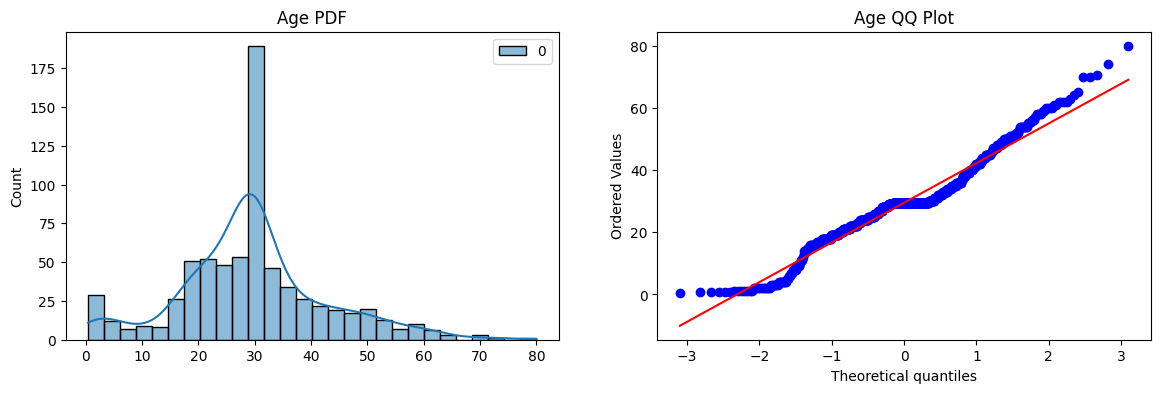

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats # Import scipy.stats for probplot

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train_age, kde=True) # Use histplot with kde=True for PDF, or distplot if available and preferred
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train_age.flatten(), dist="norm", plot=plt) # Flatten the array for probplot
plt.title('Age QQ Plot')

plt.show()

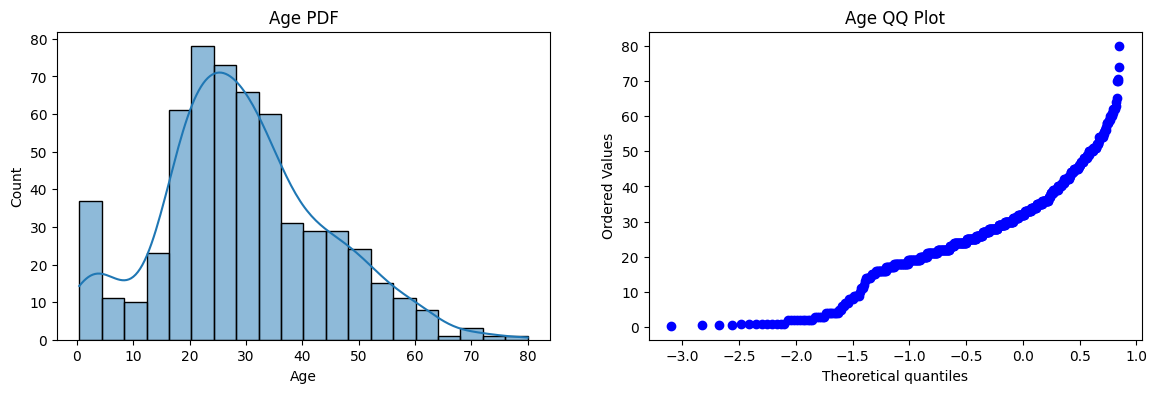

In [13]:
# Now test on actual age coulmn which was before replace values by mean.

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Age'], kde=True) # Use histplot with kde=True for PDF, or distplot if available and preferred
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'].values, dist="norm", plot=plt) # Access values as a NumPy array
plt.title('Age QQ Plot')

plt.show()

### 1. Median Imputation

This method replaces missing values with the median of the non-missing values. It's more robust to outliers than mean imputation.

Median imputed age for X_train (first 5): [45.5 23.  32.  26.   6. ]


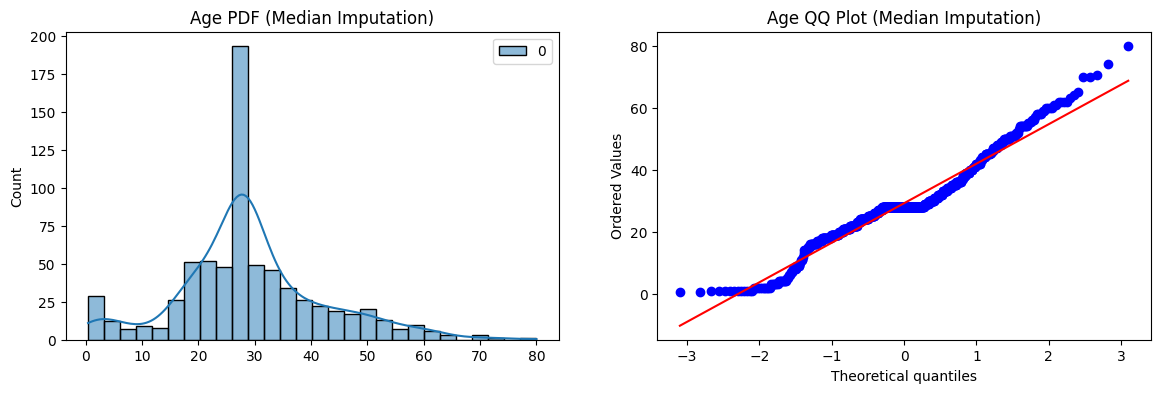

In [14]:
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Create a new imputer for median
si_median = SimpleImputer(strategy='median')

# Fit on X_train 'Age' and transform both X_train and X_test
X_train_age_median = si_median.fit_transform(X_train[['Age']])
X_test_age_median = si_median.transform(X_test[['Age']])

print(f"Median imputed age for X_train (first 5): {X_train_age_median[:5].flatten()}")

# Visualize the distribution after median imputation
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train_age_median, kde=True)
plt.title('Age PDF (Median Imputation)')

plt.subplot(122)
stats.probplot(X_train_age_median.flatten(), dist="norm", plot=plt)
plt.title('Age QQ Plot (Median Imputation)')

plt.show()

### 2. Imputation with a Predictive Model (e.g., KNNImputer)

KNNImputer uses the `k` nearest neighbors to estimate missing values. It's generally more sophisticated and can preserve data relationships better.

KNN imputed age for X_train (first 5): [45.5 23.  32.  26.   6. ]


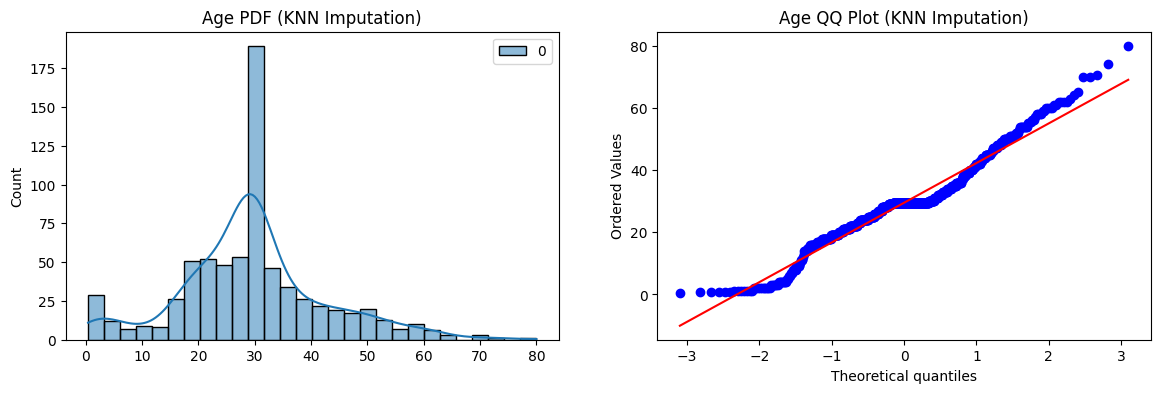

In [15]:
from sklearn.impute import KNNImputer

# Create a KNN imputer
# n_neighbors specifies the number of neighboring samples to use for imputation
knn_imputer = KNNImputer(n_neighbors=5)

# Note: KNNImputer works on the entire dataframe, so we'll apply it to X_train and X_test directly.
# However, for simplicity and demonstration on 'Age', we'll only use 'Age' here.
# In a real scenario, you'd apply it to relevant numerical features.

X_train_age_knn = knn_imputer.fit_transform(X_train[['Age']])
X_test_age_knn = knn_imputer.transform(X_test[['Age']])

print(f"KNN imputed age for X_train (first 5): {X_train_age_knn[:5].flatten()}")

# Visualize the distribution after KNN imputation
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train_age_knn, kde=True)
plt.title('Age PDF (KNN Imputation)')

plt.subplot(122)
stats.probplot(X_train_age_knn.flatten(), dist="norm", plot=plt)
plt.title('Age QQ Plot (KNN Imputation)')

plt.show()

### 3. Arbitrary Value Imputation

This involves replacing missing values with a specific number that stands out, often used when the missingness itself might carry information.

Arbitrary imputed age for X_train (first 5): [45.5 23.  32.  26.   6. ]


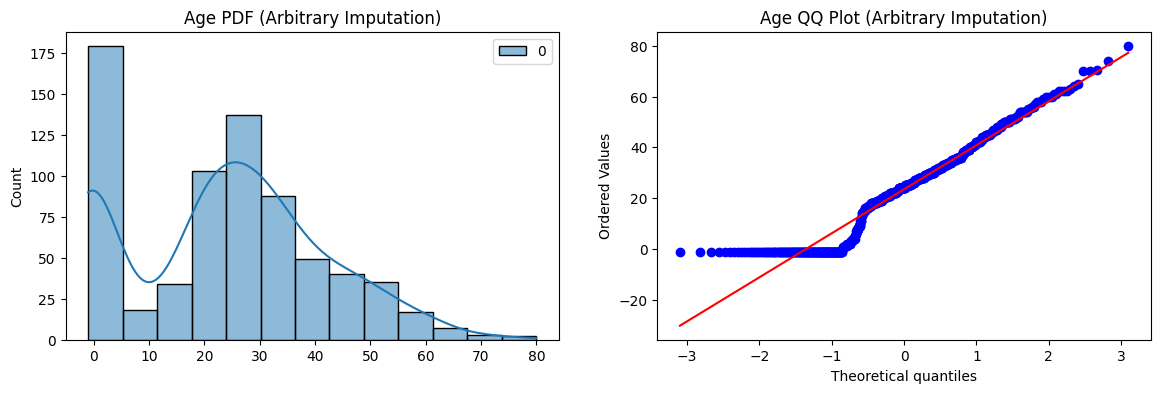

In [16]:
# For arbitrary value imputation, let's use a value like -1 or 999
# We'll use -1 since age cannot be negative, making it a clear indicator.

si_arbitrary = SimpleImputer(strategy='constant', fill_value=-1)

X_train_age_arbitrary = si_arbitrary.fit_transform(X_train[['Age']])
X_test_age_arbitrary = si_arbitrary.transform(X_test[['Age']])

print(f"Arbitrary imputed age for X_train (first 5): {X_train_age_arbitrary[:5].flatten()}")

# Visualize the distribution after arbitrary imputation
# Note: This will likely create a very non-normal distribution due to the constant value
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train_age_arbitrary, kde=True)
plt.title('Age PDF (Arbitrary Imputation)')

plt.subplot(122)
stats.probplot(X_train_age_arbitrary.flatten(), dist="norm", plot=plt)
plt.title('Age QQ Plot (Arbitrary Imputation)')

plt.show()